In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc('font',family='AppleGothic')

In [2]:
df_raw=pd.read_csv('raw_data/kaggle_survey_2022_responses.csv',low_memory=False,header=[1])

In [3]:
df_raw.columns.values[:10]

array(['Duration (in seconds)', 'What is your age (# years)?',
       'What is your gender? - Selected Choice',
       'In which country do you currently reside?',
       'Are you currently a student? (high school, university, or graduate)',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai'],
      dtype=object)

In [4]:
# 교육 플랫폼
df_edu_platforms=df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('On which platforms have you begun or completed data science courses?')]]

# 가장 도움된 교육자료
df_edu_products = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('What products or platforms did you find to be most helpful when you first started studying data science?')]]

# 주사용 언어
df_programming_lang = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('What programming languages do you use on a regular basis?')]]

# 주사용 ide
df_ide = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith("Which of the following integrated development environments (IDE's) do you use on a regular basis?")]]

# 주사용 클라우드 주피터노트북(colab 등)
df_host_notebook = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any of the following hosted notebook products?')]]

# 주 시각화 툴
df_visualize = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any of the following data visualization libraries on a regular basis?')]]

# 주 ml 툴
df_framework = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Which of the following machine learning frameworks do you use on a regular basis?')]]

# 주 computer_vision 툴
df_computer_vision = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Which categories of computer vision methods do you use on a regular basis?')]]

# 주사용 ml 알고리즘
df_ml_algo = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Which of the following ML algorithms do you use on a regular basis?')]]

# 주사용 자연어처리 툴
df_nlp = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Which of the following natural language processing (NLP) methods do you use on a regular basis?')]]

# 주사용 학습된 모델
df_pretrained = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you download pre-trained model weights from any of the following services?')]]

# 회사 주요 직책
df_main_role = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Select any activities that make up an important part of your role at work')]]

# 주 사용 클라우드 플랫폼
df_cloud_platform = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Which of the following cloud computing platforms do you use?')]]

# 주 사용 클라우드 계산 플랫폼
df_cloud_product = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any of the following cloud computing products?')]]

# 주 데이터 저장소
df_data_storage = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any of the following data storage products')]]

# 주 sql
df_data_product = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any of the following data products')]]

# 주 ml cloud product(sage maker)
df_ml_product = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any of the following managed machine learning products on a regular basis?')]]

# 주 automated ml
df_automated_ml = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any of the following automated machine learning tools?')]]

# 주 model 제공 방법
df_model_serve = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any of the following products to serve your machine learning models?')]]

# 주 model monitor 방법
df_model_checker = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any tools to help monitor your machine learning models and/or experiments?')]]

# 주요 사용 하드웨어
df_ml_hardware = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any of the following types of specialized hardware when training machine learning models?')]]


In [5]:
df_li=[df_edu_platforms,
       df_edu_products ,
       df_programming_lang ,
       df_ide ,
       df_host_notebook ,
       df_visualize ,
       df_framework ,
       df_computer_vision ,
       df_ml_algo ,
       df_nlp ,
       df_pretrained ,
       df_main_role ,
       df_cloud_platform ,
       df_cloud_product ,
       df_data_storage ,
       df_data_product ,
       df_ml_product ,
       df_automated_ml ,
       df_model_serve ,
       df_model_checker ,
       df_ml_hardware
       ]

In [6]:
df_cleaned = list()
for df in df_li:
    df.columns=[i.split('Selected Choice')[-1].split('(')[0] for i in df.columns]
    df=pd.DataFrame(df.count(),columns=['count'])
    df_cleaned.append(df)

In [16]:
# 학계 페이퍼 제출 경험
df_paper=pd.DataFrame(df_raw.loc[:,'Have you ever published any academic research (papers, preprints, conference proceedings, etc)?'].value_counts())
# 코딩 경력
df_coding_time=pd.DataFrame(df_raw.loc[:,'For how many years have you been writing code and/or programming?'].value_counts())
# ml 경력
df_ml_time=pd.DataFrame(df_raw.loc[:,'For how many years have you used machine learning methods?'].value_counts())
# 직종
df_job=pd.DataFrame(df_raw.loc[:,'Select the title most similar to your current role (or most recent title if retired): - Selected Choice'].value_counts())
# 나라
df_country=pd.DataFrame(df_raw.loc[:,'In which country do you currently reside?'].value_counts())
# 성별
df_sex=pd.DataFrame(df_raw.loc[:,'What is your gender? - Selected Choice'].value_counts())
# 나이
df_age=pd.DataFrame(df_raw.loc[:,'What is your age (# years)?'].value_counts())
# 연봉
df_yearly_compensation=pd.DataFrame(df_raw.loc[:,'What is your current yearly compensation (approximate $USD)?'].value_counts())

In [45]:
df_li = [df_paper,
df_coding_time,
df_ml_time,
df_job,
df_country,
df_sex,
df_age,
df_yearly_compensation,]

In [39]:
for df in df_li:
    df.index=[i.split('(')[0] for i in df.index]

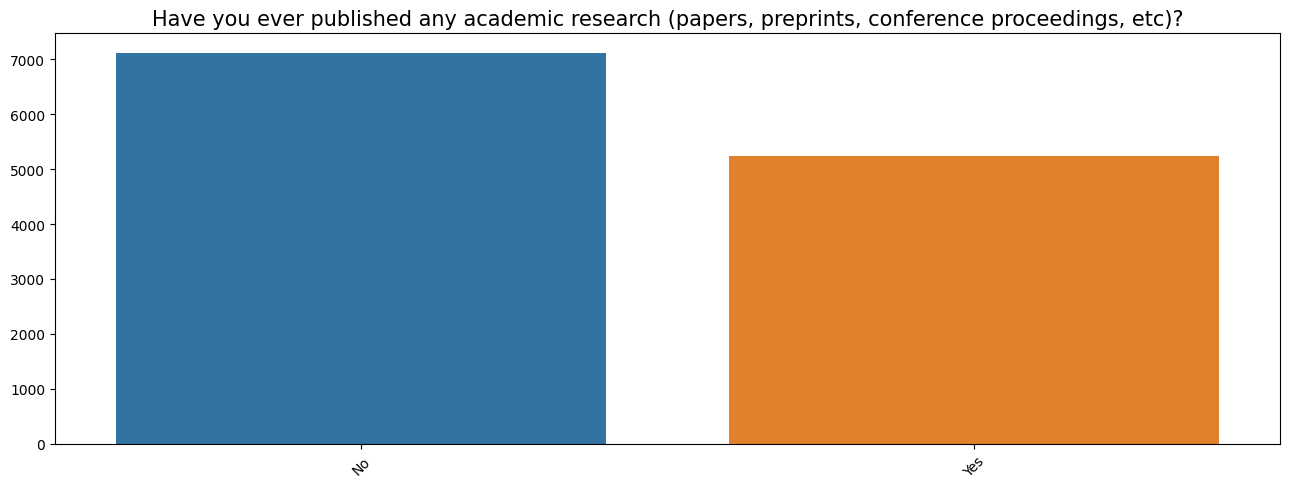

FileNotFoundError: [Errno 2] No such file or directory: 'imgs/For how many years have you been writing code and/or programming?.jpg'

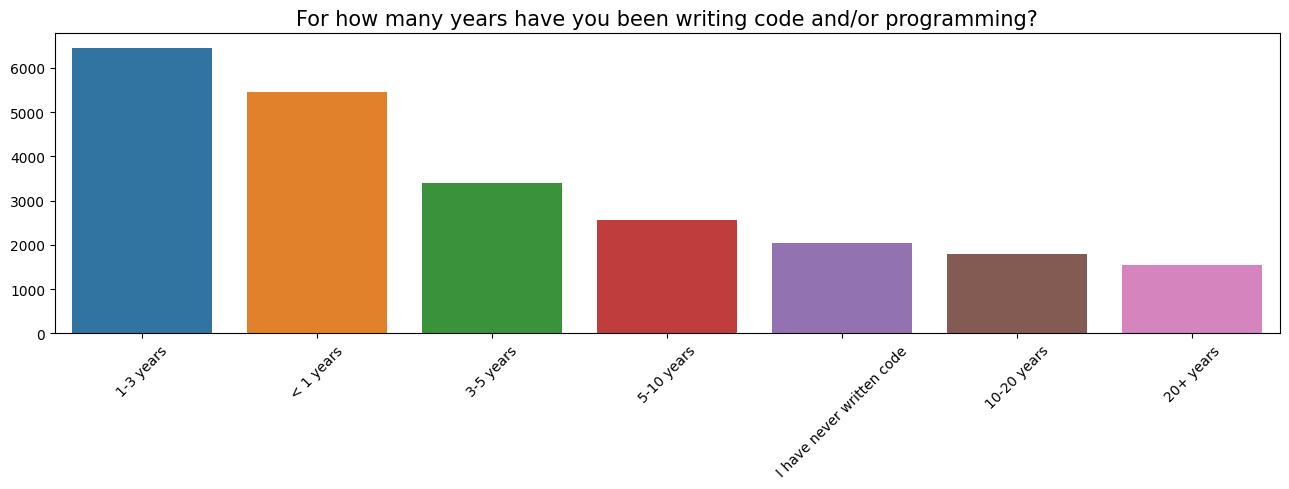

In [59]:
for df in df_li:
    plt.figure(figsize=(13,5))
    sns.barplot(
        data=df.reset_index(),
        x='index',
        y=df.columns[0]
    )
    plt.xticks(rotation = 45)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(df.columns[0],fontsize=15)
    plt.tight_layout()
    plt.savefig(f'imgs/{df.columns[0]}.jpg')
    plt.show()


In [7]:
names = ['교육 플랫폼',
'가장 도움된 교육자료',
'주 사용 프로그래밍 언어',
'주 사용 IDE',
'주사용 클라우드 주피터노트북(colab 등)',
'주 시각화 툴',
'주 ml 툴',
'주 computer_vision 툴',
'주사용 ml 알고리즘',
'주사용 자연어처리 툴',
'주사용 학습된 모델',
'회사 주요 직책',
'주 사용 클라우드 플랫폼',
'주 사용 클라우드 계산 플랫폼',
'주 데이터 저장소',
'주 sql',
'주 ml cloud product(sage maker)',
'주 automated ml',
'주 model 제공 방법',
'주 model monitor 방법',
'주요 사용 하드웨어',]

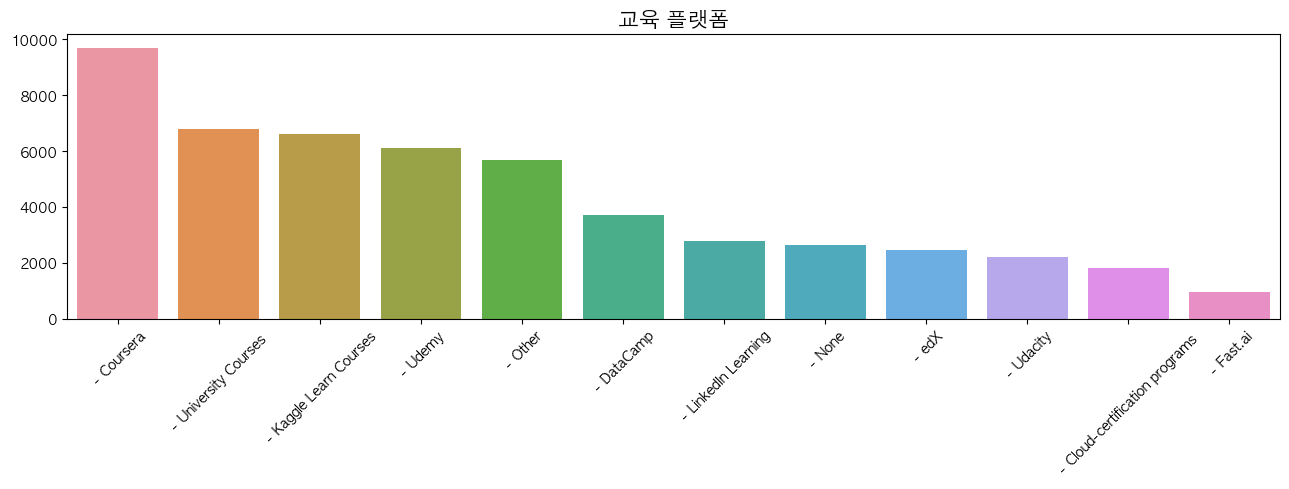

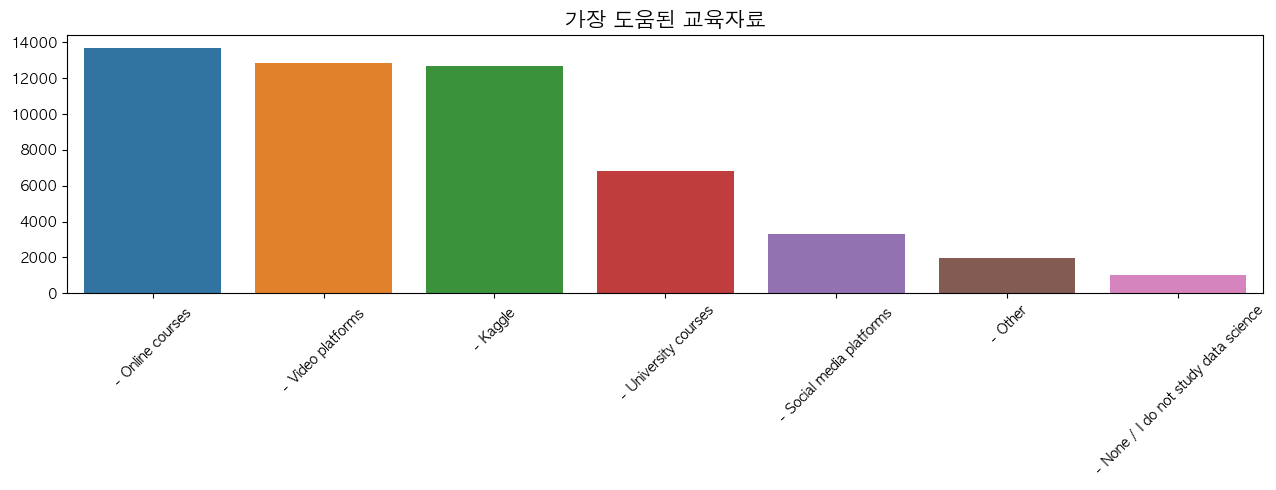

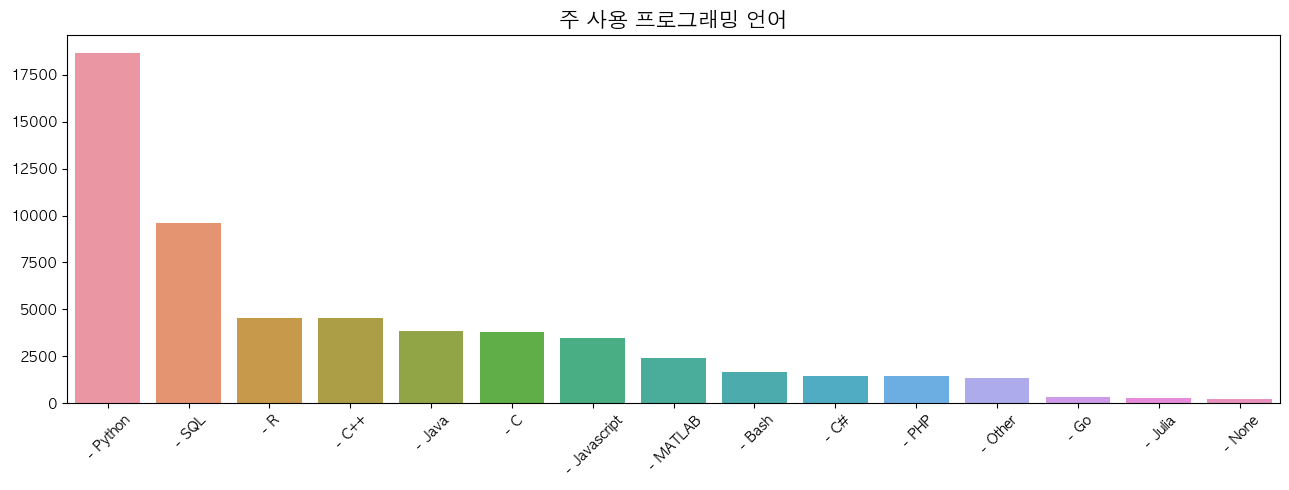

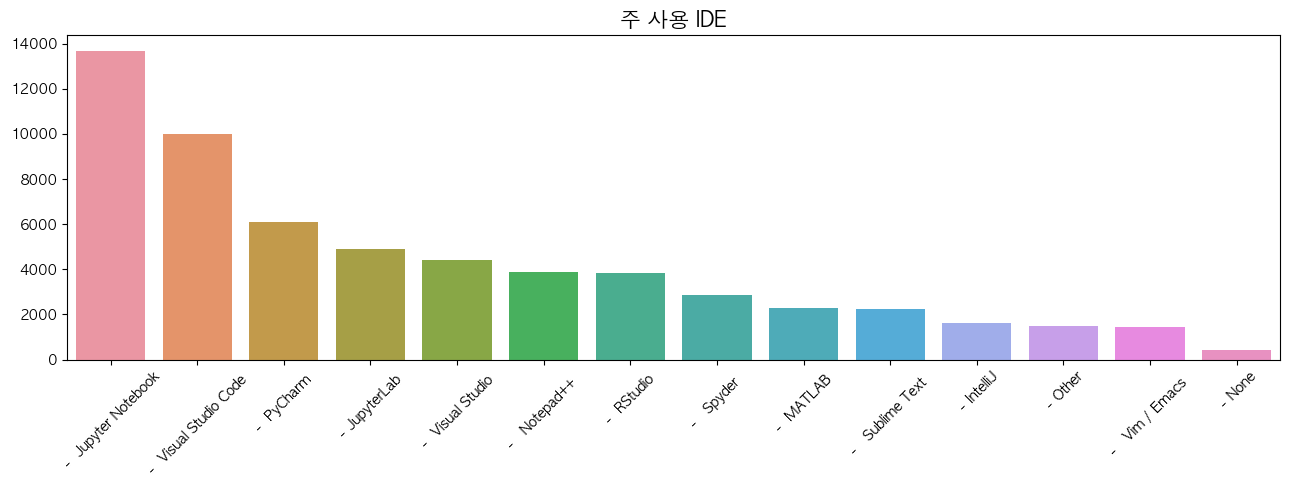

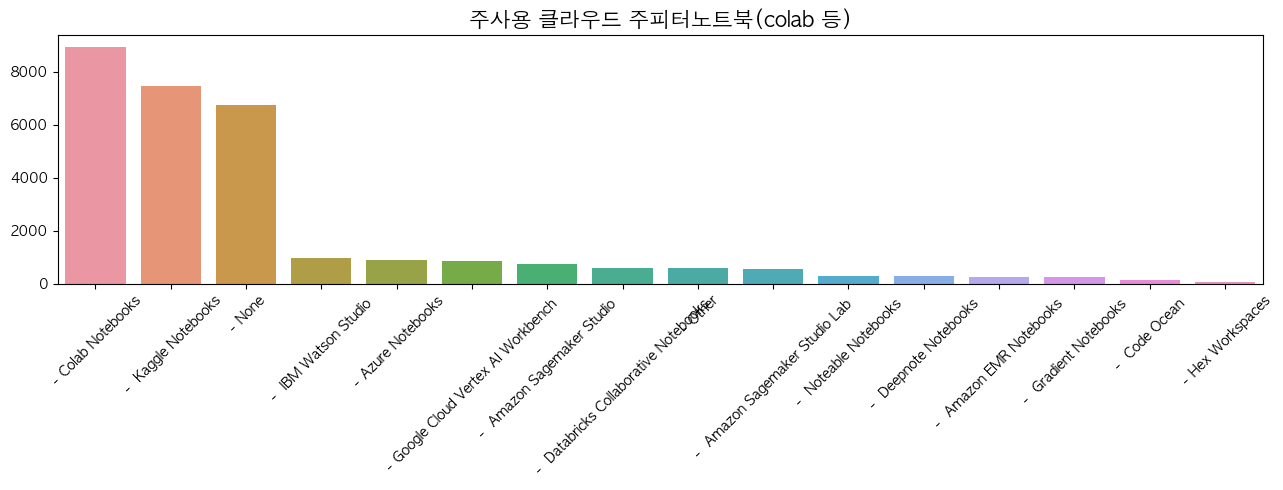

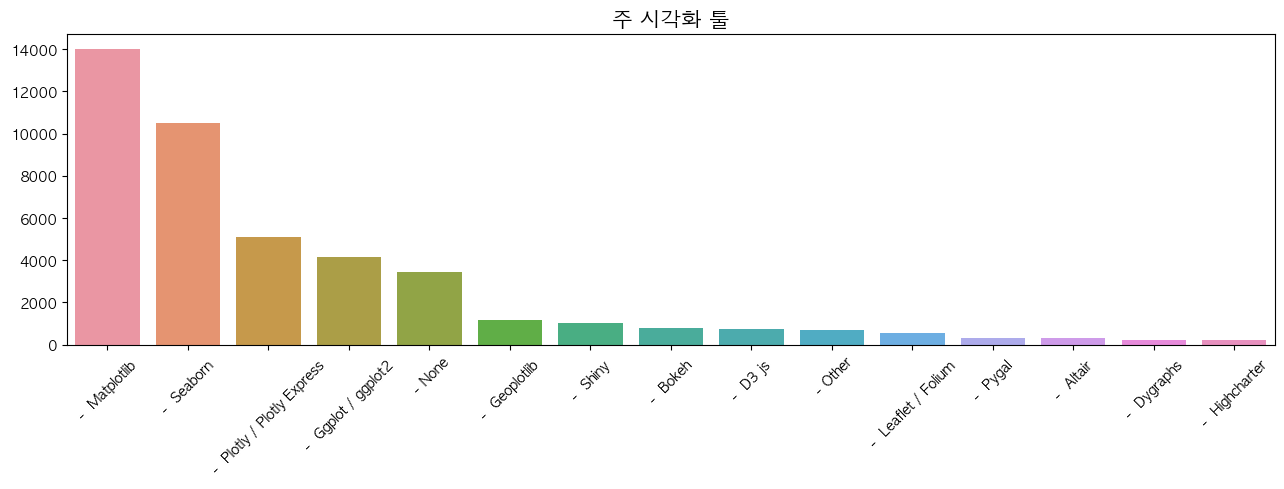

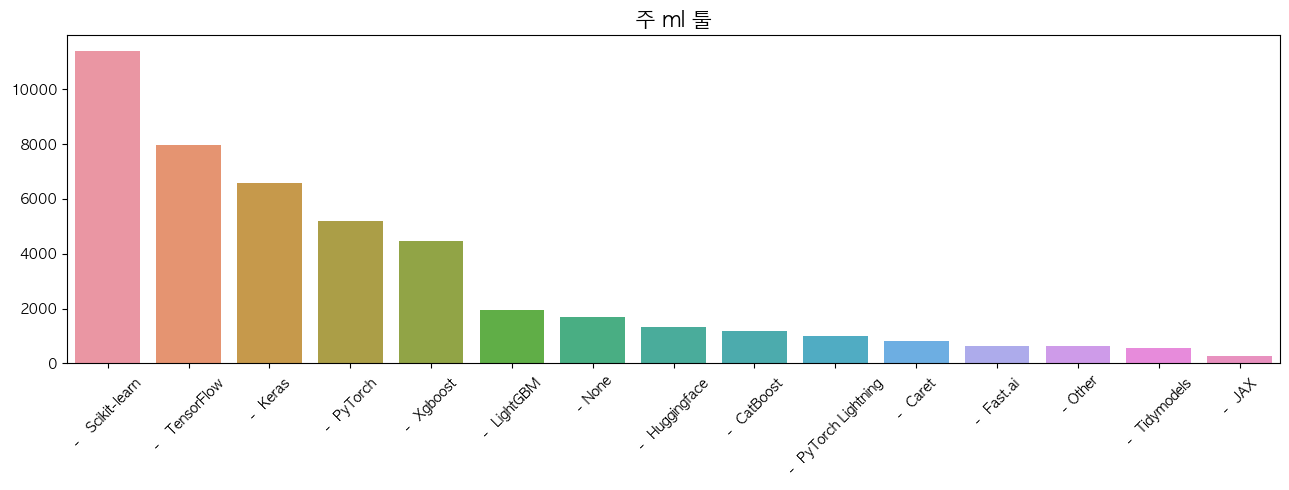

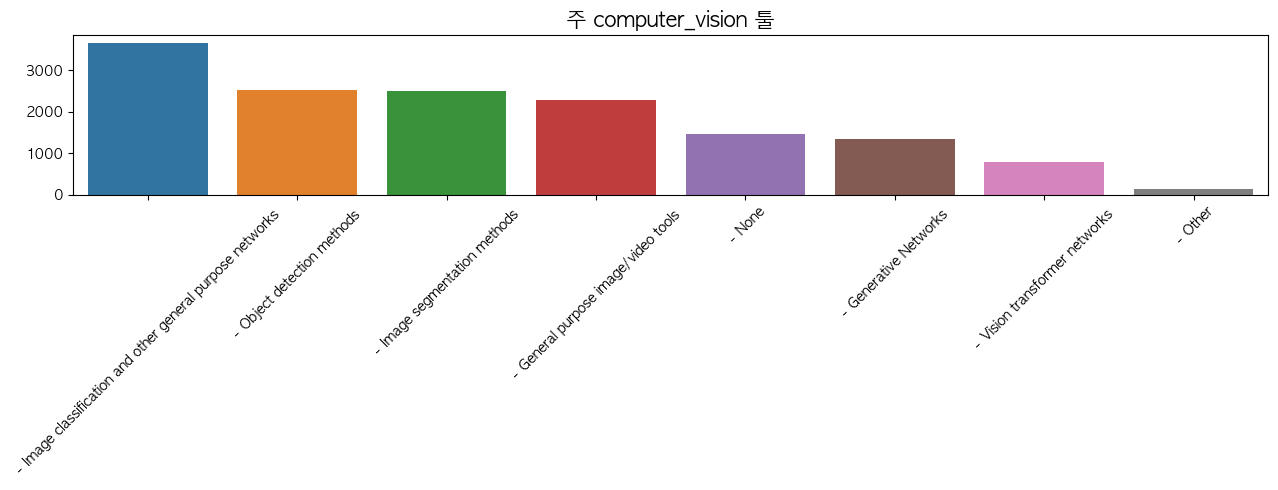

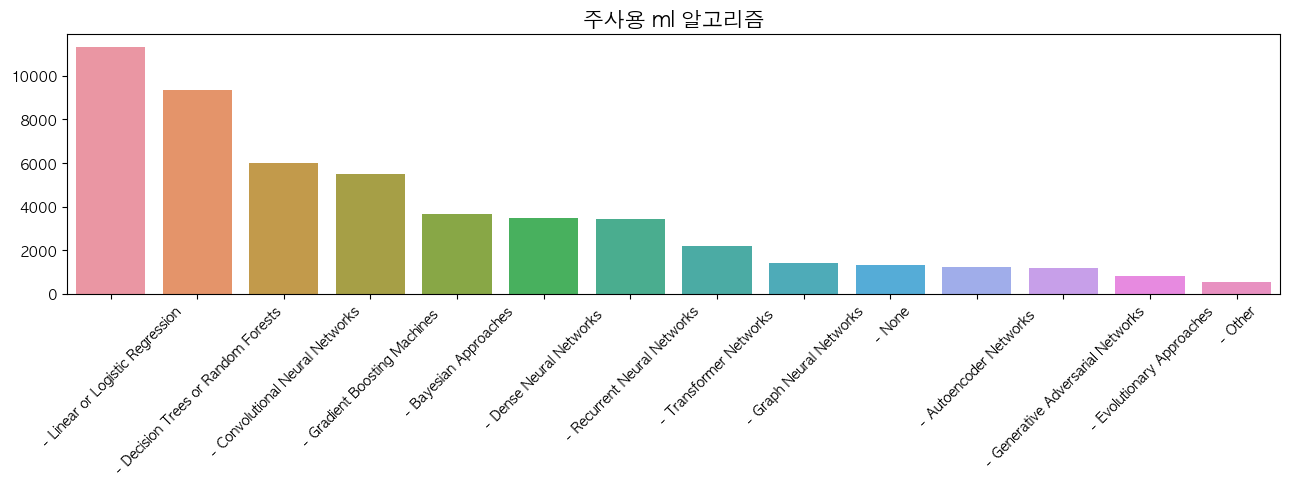

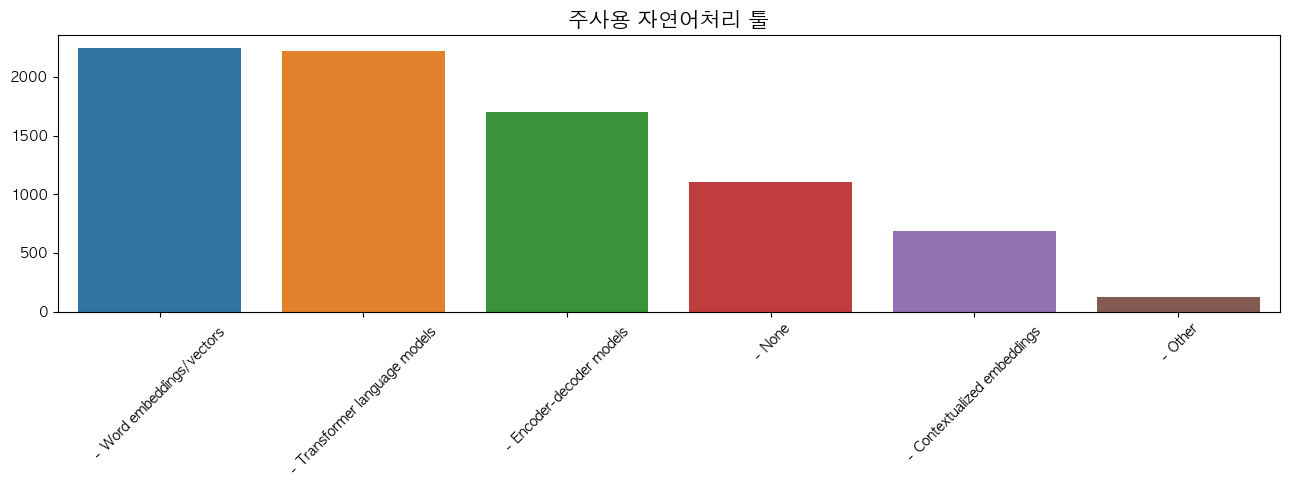

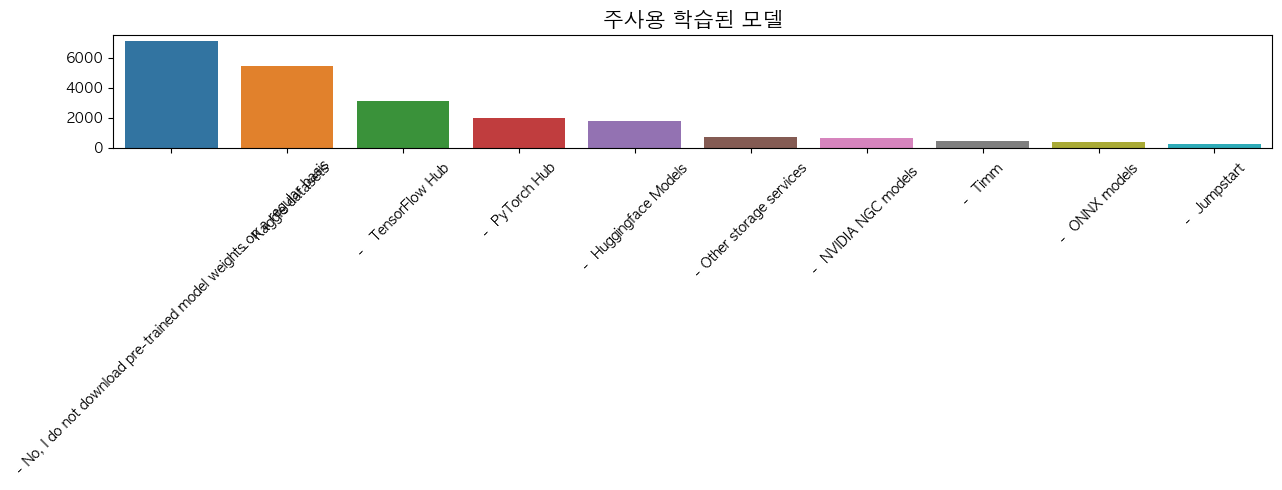

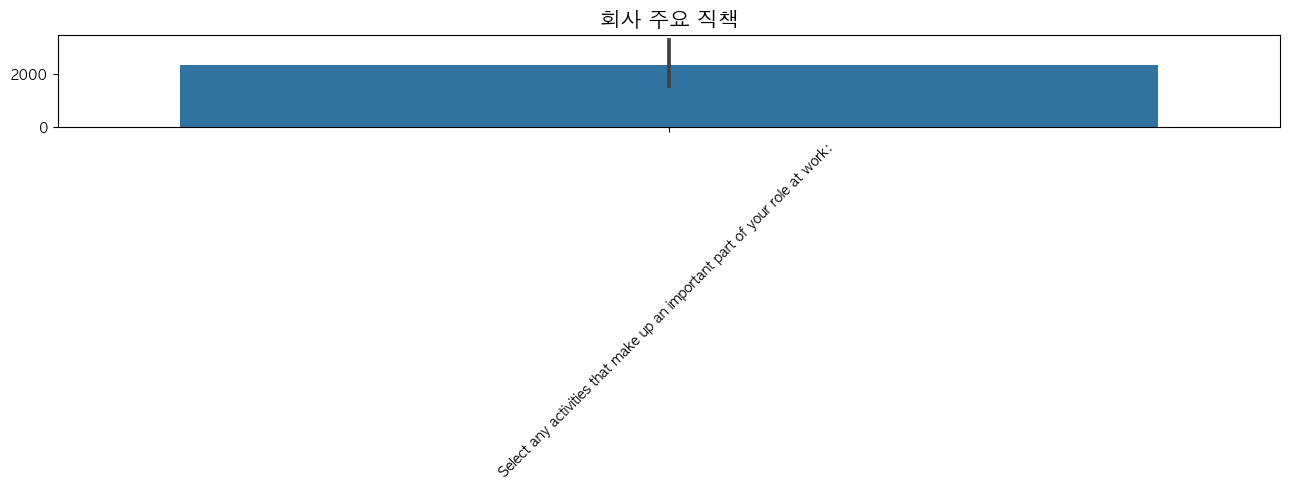

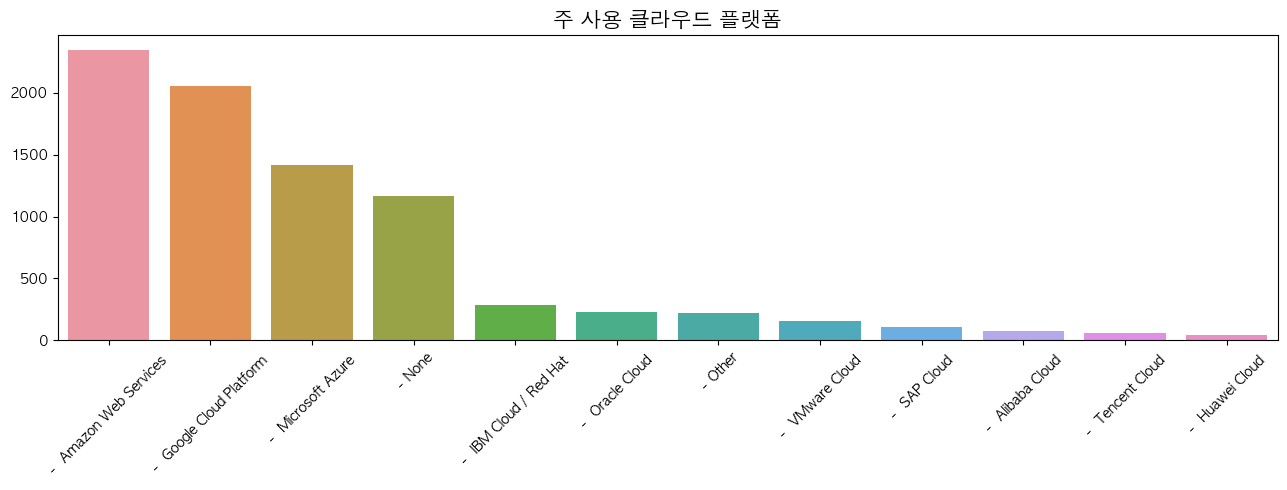

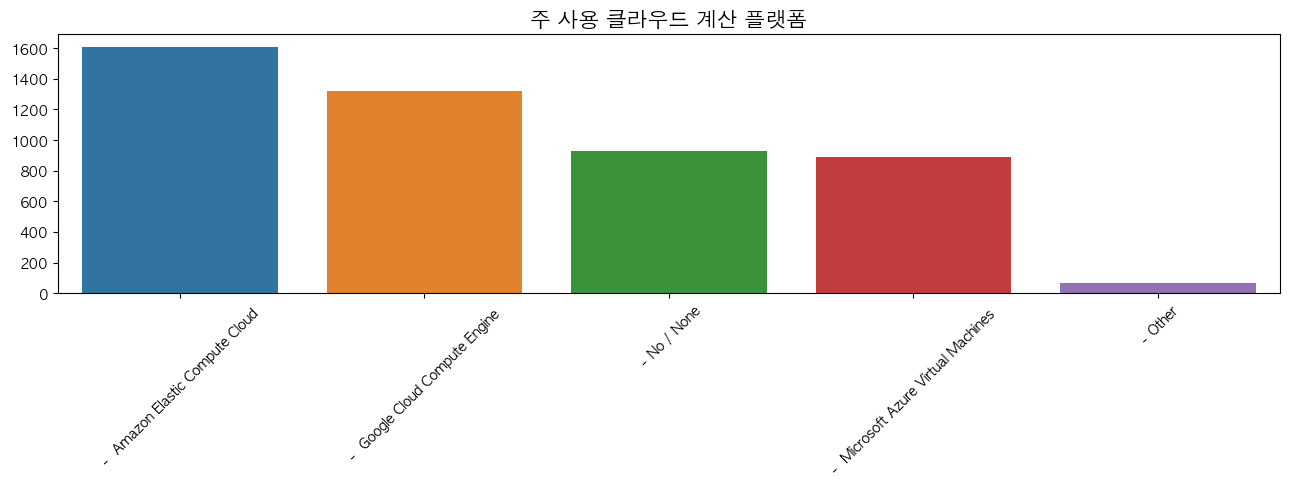

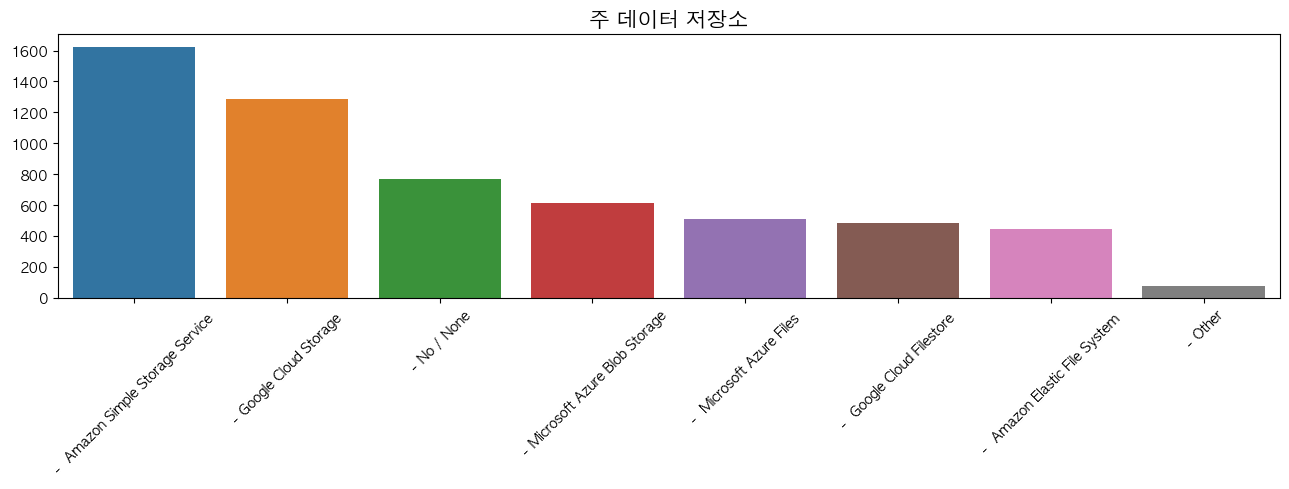

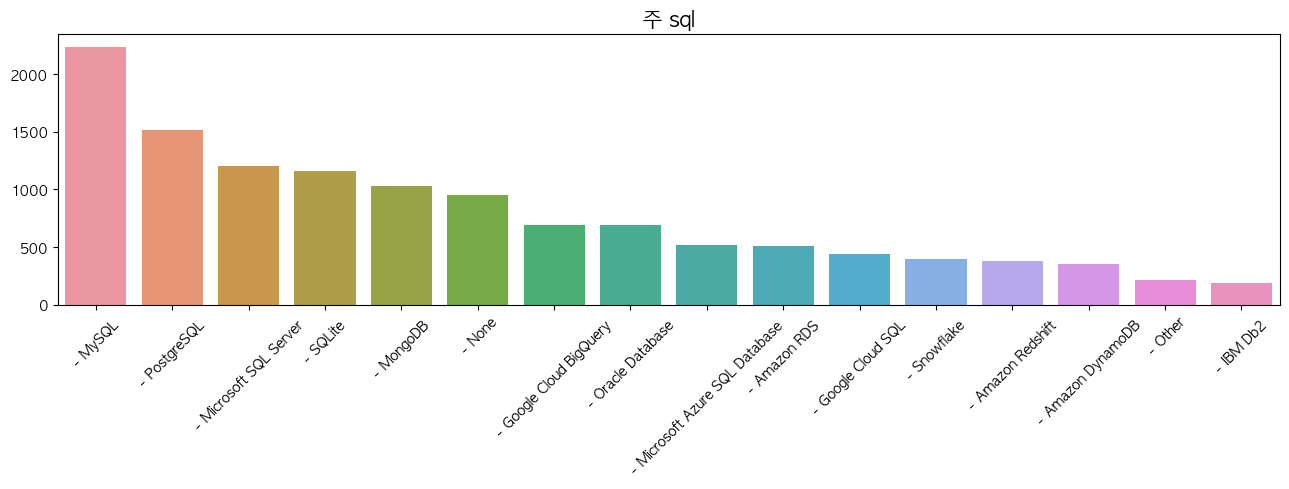

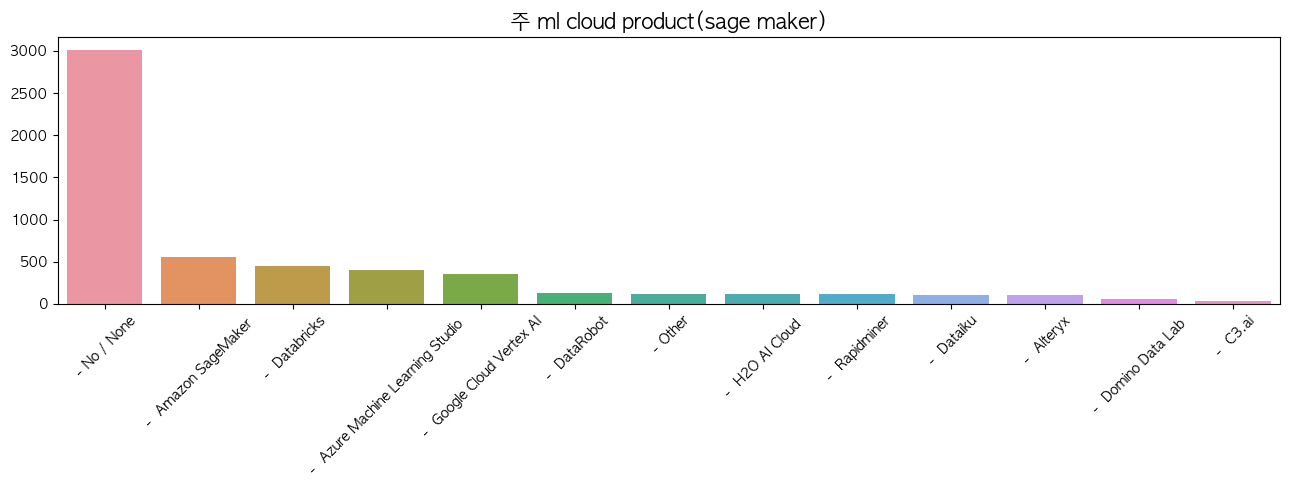

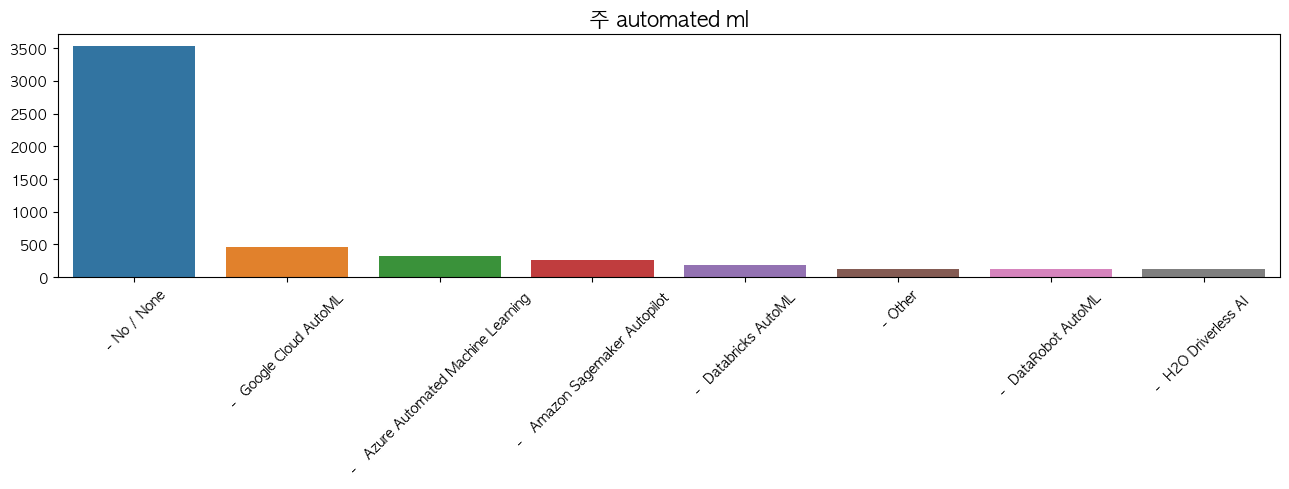

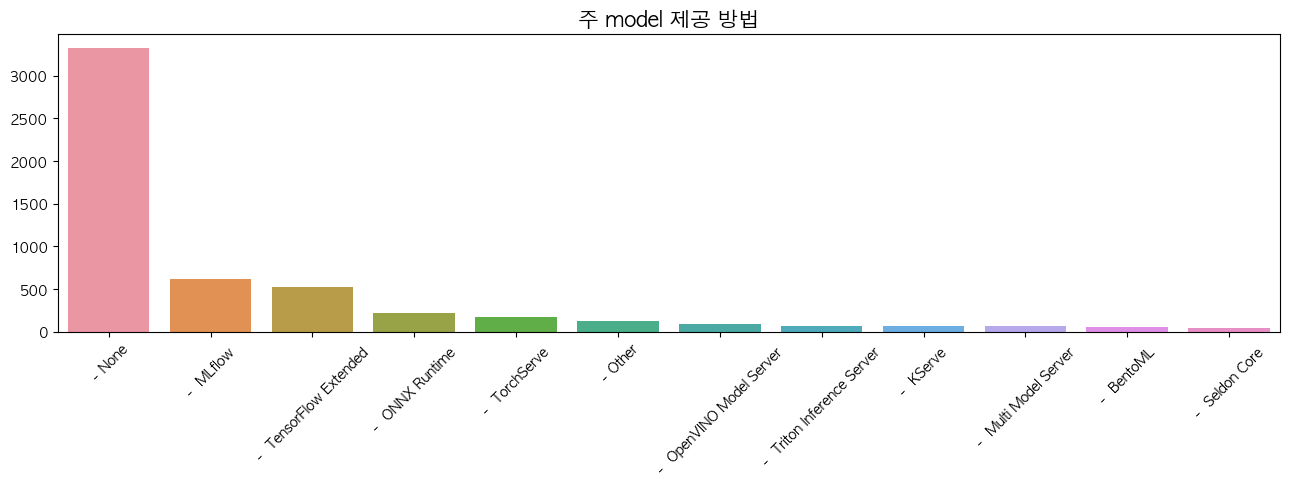

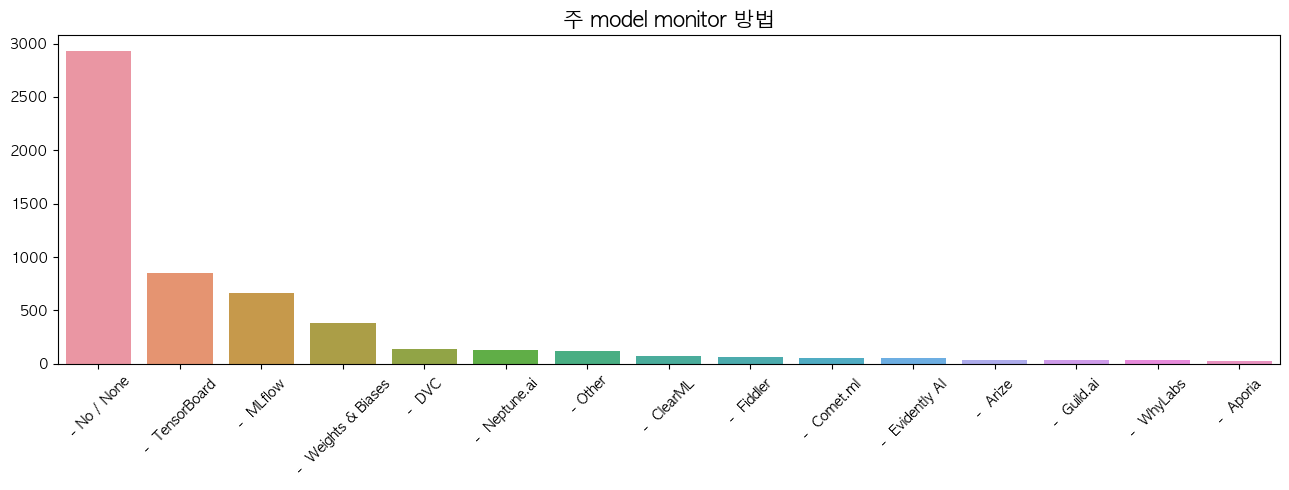

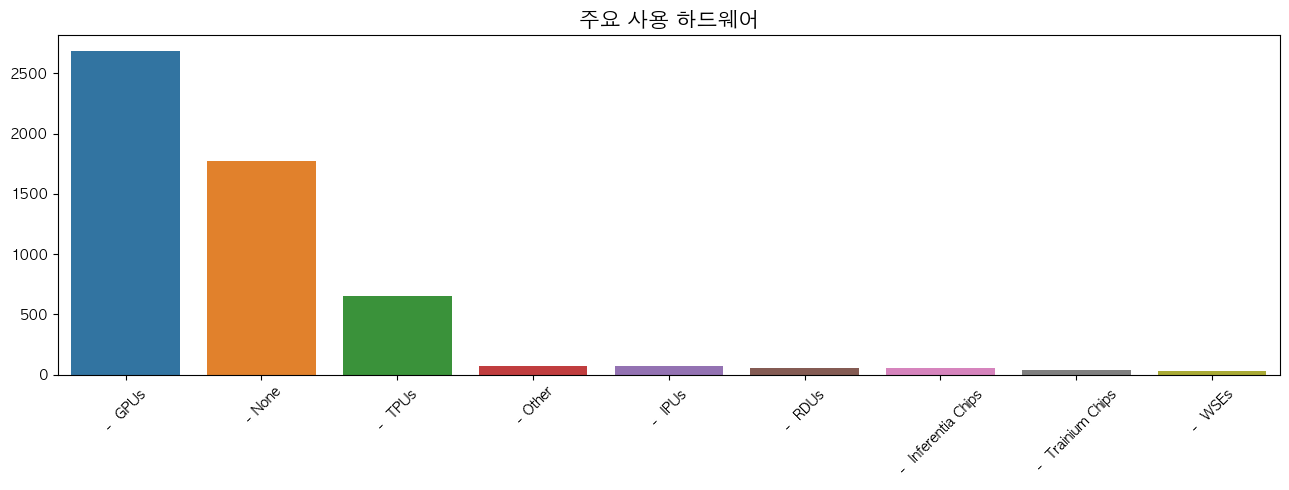

In [10]:
for i,df in enumerate(df_cleaned):
    plt.figure(figsize=(13,5))
    sns.barplot(
        data=df.reset_index().sort_values('count',ascending=False),
        x='index',
        y=df.columns[0]
    )

    plt.xticks(rotation = 45)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(names[i],fontsize=15)
    plt.tight_layout()
    # plt.savefig(f'imgs/{names[i]}.jpg')
    plt.show()

In [26]:
cols=['What is your gender? - Selected Choice']+[i for i in df_raw.iloc[:,5:].columns if i.startswith('What programming languages do you use on a regular basis?')]
df_programming_lang_gender = df_raw.loc[:,cols]

In [47]:
['sex']+list(df_programming_lang.columns)

['sex',
 ' - Python',
 ' - R',
 ' - SQL',
 ' - C',
 ' - C#',
 ' - C++',
 ' - Java',
 ' - Javascript',
 ' - Bash',
 ' - PHP',
 ' - MATLAB',
 ' - Julia',
 ' - Go',
 ' - None',
 ' - Other']

In [54]:
man_programming=temp[temp['sex'] == 'Man'].iloc[:,1:].count()

In [55]:
woman_programming=temp[temp['sex'] == 'Woman'].iloc[:,1:].count()

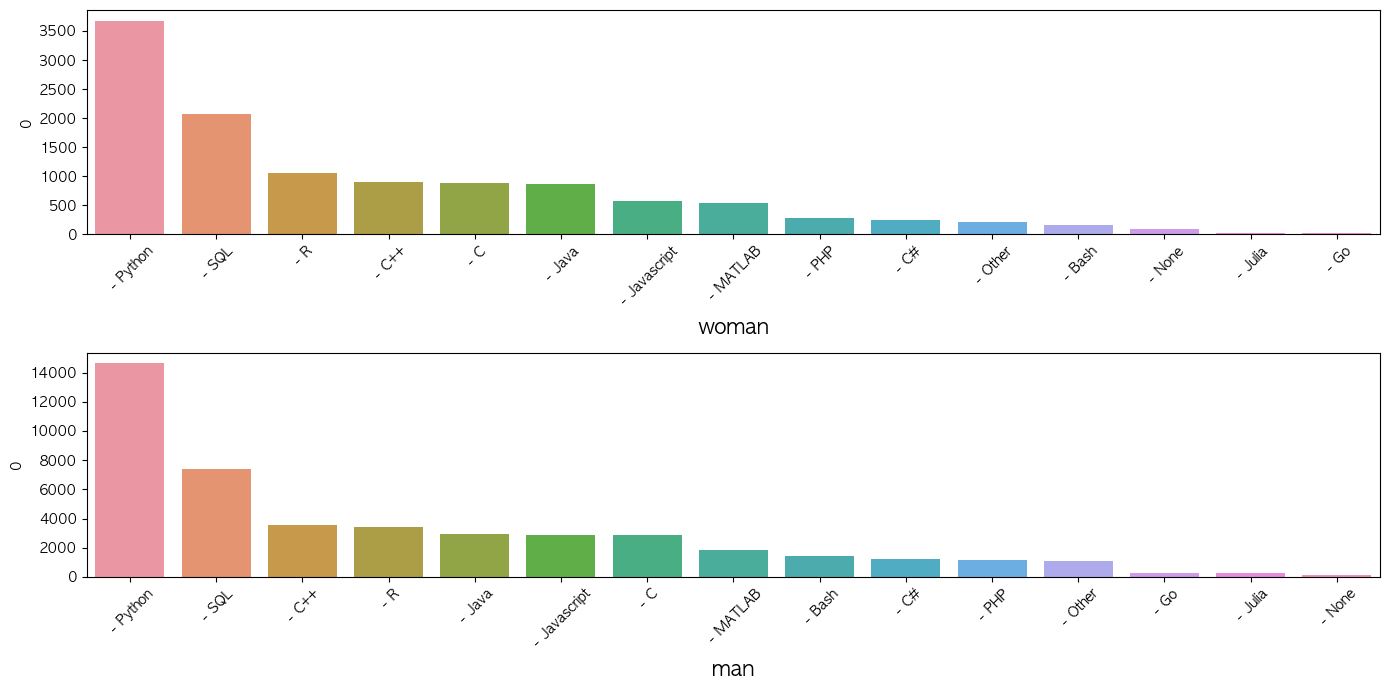

In [66]:
plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
sns.barplot(data=woman_programming.reset_index().sort_values(0,ascending=False),
             x='index',
             y=0)
plt.xticks(rotation=45)
plt.xlabel('woman',fontsize=15)
plt.tight_layout()
plt.subplot(2,1,2)
sns.barplot(data=man_programming.reset_index().sort_values(0,ascending=False),
             x='index',
             y=0)
plt.xticks(rotation=45)
plt.xlabel('man',fontsize=15)
plt.tight_layout()
plt.show()